**Mohamed ALLILI & Sabrina CHAOUCHE**

# 3I026 - Intelligence artificielle & Data science

# Projet

## Partie 1 - Description du problème

Dans une équipe de football, les joueurs sont répartis généralement en 4 catégories selon le poste occupé: attaquant, defenseur, milieu de terrain ou gardien de but.
Dans ce notebook, on va essayer de définir cette répartition de manière automatique.

## Partie 2 - Modèle

Pour pouvoir classifier ces joueurs, on devra d'abord faire un clustering hiérarchique d'où on pourra identifier le nombre de clusters possibles à construire à partir des données.
Par la suite on utilisera l'algorithme des k-moyennes pour créer les clusters et prédire la classe d'un joueur donné.

## Partie 3 - Code

#### Variables utilisées:
<ul>
<li> <b> data_row: </b> données lues directement à partir du fichier </li>
<li> <b> data_to_use: </b> données traitées pour effectuer les différents calculs</li>
<li> <b> columns_playerattributes_grouping: </b> colonnes à utiliser pour effectuer des groupements des joueurs selon "player_api_id" </li>
<li> <b> columns_playerattributes_needed: </b> Colonnes à utiliser pour récupérer les données dont on a besoin pour l'application de l'algorithme k-moyennes</li>
<li> <b> attaquants: </b> tableau de longueur 4 contenant 4 attaquants</li>
<li> <b> defenseurs: </b> tableau de longueur 4 contenant 4 défenseurs</li>
<li> <b> milieu_de_terrain: </b> tableau de longueur 4 contenant 4 milieu de terrain</li>
<li> <b> gardiens_de_buts: </b> tableau de longueur 4 contenant 4 gardiens de buts</li>
</ul>

In [1]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from operator import itemgetter
import kmoyennes as km
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import random

%matplotlib inline  

In [2]:
def get_data_row():
    # Lecture des données à partir du fichier CSV
    data_row = pd.read_csv("soccer_csv/playerattributes.csv")
    return data_row

In [3]:
def get_data(data_row):
    # Récupération des données pertinantes
    data_playerattributes = data_row[columns_playerattributes_grouping]
    
    # Suppression des lignes contenant des valeurs à NULL
    for k in data_playerattributes[columns_playerattributes_grouping]:
        data_playerattributes.dropna(axis = 0, how = 'any', inplace = True)
        
    return data_playerattributes

In [4]:
def remove_data_test(data):
    # Suppression des données des joueurs à utiliser pour vérifier la fiabilité du clustering
    data = data[~ data_row.player_api_id.isin([30981, 30893, 107417, 19533, 37482, 30962, 80562, 41884, 30955, 95078, 24235, 30955, 95078, 190972, 31097, 27299, 170323, 182917, 30657])]
    data = data.groupby(['player_api_id']).mean()
    data = data[columns_playerattributes_needed]
    return data

In [5]:
def get_attaquants():
    # Données attaquants: Lionel Messi, Cristiano Ronaldo, Eden Hazard, Neymar
    Lionel_Messi = np.array(data_row[data_row.player_api_id == 30981][columns_playerattributes_needed].mean())
    Cristiano_Ronaldo = np.array(data_row[data_row.player_api_id == 30893][columns_playerattributes_needed].mean())
    Eden_Hazard = np.array(data_row[data_row.player_api_id == 107417][columns_playerattributes_needed].mean())
    Neymar = np.array(data_row[data_row.player_api_id == 19533][columns_playerattributes_needed].mean())
    attaquants = np.matrix([Lionel_Messi, Cristiano_Ronaldo, Eden_Hazard, Neymar])
    attaquants_array = np.array(attaquants)
    return attaquants_array

In [6]:
def get_defenseurs():
    # Données defenseurs: Gerard Pique, Sergio Ramos, Thiago Silva, Giorgio Cheiellini 
    Gerard_Pique = np.array(data_row[data_row.player_api_id == 37482][columns_playerattributes_needed].mean())
    Sergio_Ramos = np.array(data_row[data_row.player_api_id == 30962][columns_playerattributes_needed].mean())
    Thiago_Silva = np.array(data_row[data_row.player_api_id == 80562][columns_playerattributes_needed].mean())
    Giorgio_Cheiellini = np.array(data_row[data_row.player_api_id == 41884][columns_playerattributes_needed].mean())
    defenseurs = np.matrix([Gerard_Pique, Sergio_Ramos, Thiago_Silva, Giorgio_Cheiellini])
    defenseurs_array = np.array(defenseurs)
    return defenseurs_array

In [7]:
def get_milieu_de_terrain():
    # Données milieu de terrain: Andres Iniesta, Toni Kroos, Marco Verratti, Luka Modric
    Andres_Iniesta = np.array(data_row[data_row.player_api_id == 30955][columns_playerattributes_needed].mean())
    Toni_Kroos = np.array(data_row[data_row.player_api_id == 95078][columns_playerattributes_needed].mean())
    Marco_Verratti = np.array(data_row[data_row.player_api_id == 190972][columns_playerattributes_needed].mean())
    Luka_Modric = np.array(data_row[data_row.player_api_id == 31097][columns_playerattributes_needed].mean())
    milieu_de_terrain = np.matrix([Andres_Iniesta, Toni_Kroos, Marco_Verratti, Luka_Modric])
    milieu_de_terrain_array = np.array(milieu_de_terrain)
    return milieu_de_terrain_array

In [8]:
def get_gardiens_de_buts():
    # Données gerdiens de buts: Manuel Neuer, Thibaut Courtois, David de Gea, Iker Casillas
    Manuel_Neuer = np.array(data_row[data_row.player_api_id == 27299][columns_playerattributes_needed].mean())
    Thibaut_Courtois = np.array(data_row[data_row.player_api_id == 170323][columns_playerattributes_needed].mean())
    David_de_Gea = np.array(data_row[data_row.player_api_id == 182917][columns_playerattributes_needed].mean())
    Iker_Casillas = np.array(data_row[data_row.player_api_id == 30657][columns_playerattributes_needed].mean())
    gardiens_de_but = np.matrix([Manuel_Neuer, Thibaut_Courtois, David_de_Gea, Iker_Casillas])
    gardiens_de_but_array = np.array(gardiens_de_but)
    return gardiens_de_but_array

### 

In [9]:
def fonction_linkage(data):
    data_linkage = data[columns_playerattributes_needed].as_matrix()
    type(data_linkage)
    link = linkage(data_linkage[500 : 600], 'complete') # Utilisation du clustering sur un échantillon de 100 lignes pour avoir un affichage optimal
    plt.figure()
    plt.title("Dendrogramme des joueurs: attaquants, defenseurs, milieu de terrain et gardiens de buts")
    dn = dendrogram(link)

In [10]:
def transformer_donnees_kmeans(data_to_use):
    #Transformer le dataframe en numpy array pour pouvoir utiliser l'algorithme des k-means de sklearn 
    data_playerattributes_kmeans = data_to_use.values
    
    # Transformation des données pour l'affichage
    data_embedded = TSNE(n_components = 2).fit_transform(data_playerattributes_kmeans)
    return data_embedded

In [11]:
def k_means_sklearn(data_embedded):
    kmeans = KMeans(n_clusters = 4, init = 'k-means++', n_init = 50).fit(data_embedded)
    return kmeans

In [12]:
def afficher_clustering(data_embedded, labels, centres):
    plt.scatter(data_embedded[:, 0], data_embedded[:, 1], c = labels , cmap = 'rainbow')  
    plt.scatter(centres[:, 0] , centres[:, 1], color = 'black')
    plt.title("Clustering des joueurs: attaquants, defenseurs, milieu de terrain, gardiens de buts")
    plt.show()

In [13]:
def test_clustering(kmeans_clustering):
    # Prédictions sur les attaquants
    print("Le résultat sur les attaquants:")
    print(kmeans_clustering.predict(attaquants))
    # Prédictions sur les défenseurs
    print("Le résultat sur les défenseurs:")
    print(kmeans_clustering.predict(defenseurs))
    # Prédictions sur les milieu de terrain
    print("Le résultat sur les milieu de terrain:")
    print(kmeans_clustering.predict(milieu_de_terrain))
    # Prédiction sur les gardiens du buts
    print("Le résultat sur les gardiens du buts:")
    print(kmeans_clustering.predict(gardiens_de_buts))

### Implémenation de l'algorithme des k-moyennes

In [14]:
class clustering_km:  
    
    def __init__(self, df, k, iter_max, epsilon):
        self.df = df
        self.k = k
        self.iter_max = iter_max
        self.epsilon = epsilon
        self.centroides = pd.DataFrame()
        self.matrice_affectation = None
    
    def train(self):
        data_normalized = normalisation(self.df)
        self.centroides, self.matrice_affectation = kmoyennes(self.k, data_normalized, self.epsilon, self.iter_max)
        
    # Fonction pour prédire à quel cluster appartient un joueur passé en entrée
    def predict(self, joueur):
        distances = list()
        centres = self.centroides.as_matrix()
        for c in centres:
            d = dist_vect(c, joueur)
            distances.append(d)
        return((min(enumerate(distances), key = itemgetter(1))[0]))
    

In [27]:
# Fonctions à utiliser pour l'algorithme des k-moyennes

# Normalisation des données :
def normalisation(dfo):
    df = dfo.copy()
    nb_lig, nb_col = df.shape
    for j in range(nb_col):
        colonne = df[df.columns[j]]
        max_col = colonne.max()
        min_col = colonne.min()
        for i in range(nb_lig):
            norm = (colonne.iloc[i] - min_col)*1.0 / (max_col - min_col)
            df.set_value(i, j, norm, takeable=True)
    return df

# -------
# Fonctions distances
def dist_vect(p1 , p2):
    somme_carre = 0
    for i in range(len(p1)):
        somme_carre += (p1[i] - p2[i]) * (p1[i] - p2[i])
    dist = math.sqrt(somme_carre)
    return dist

# -------
# Calculs de centroïdes :
def centroide(df):
    nb_lig, nb_col = df.shape
    if nb_lig == 0 :
        return "ERREUR : Longueur == 0"
    l_centroide = np.array([])
    for j in range(nb_col):
        colonne = df[df.columns[j]]
        moyenne = colonne.mean()
        l_centroide =  np.hstack((l_centroide, [moyenne]))
    return pd.DataFrame ([l_centroide], columns=df.columns)

# -------
# Inertie des clusters :
def inertie_cluster(df):
    somme = 0
    nb_lig, nb_col = df.shape
    ck = centroide(df)
    for i in range(len(df)):
        dist = dist_vect(df.iloc[i], ck.iloc[0])
        somme += dist*dist
    return somme
    
# -------
# Algorithmes des K-moyennes :
def initialisation(k, df):
    nb_lig, nb_col = df.shape
    if k <= 1 or k > nb_lig:
        print("ERREUR k : initialisation")
        return
    indices = list(range(nb_lig))
    indices_rand = random.sample(indices, k)
    d_res = list()
    for i in range(k):
        d_res.append(df.iloc[indices_rand[i]])
        
    d_res = pd.DataFrame(d_res)
    return d_res

# -------
def plus_proche(e, dfc):
    nb_ligne, nb_colonne = dfc.shape
    dist_min = dist_vect(e, dfc.iloc[0])
    index_min = 0
    for i in range(nb_ligne):
        dist = dist_vect(e, dfc.iloc[i])
        if dist < dist_min :
            dist_min = dist
            index_min = i
    return index_min

# -------
def affecte_cluster(df, centro):
    nb_lig, nb_col = df.shape
    m_aff = dict()
    for i in range(len(centro)):
        m_aff[i] = list()
    for i in range(nb_lig):
        i_cluster = plus_proche(df.iloc[i], centro)
        m_aff[i_cluster].append(i)
    
    return m_aff

# -------
def nouveaux_centroides(df, d_aff):
    l_centroide = list()
    
    for k, v in d_aff.items():
        l_c = list()
        for i in range(len(v)):
             l_c.append(df.iloc[v[i]])
        d_c = pd.DataFrame(l_c)
        c = centroide(d_c)
        l_centroide.append(c.iloc[0])
    d_res = pd.DataFrame(l_centroide , index=d_aff.keys(), columns=df.columns)
    return d_res

# -------
def inertie_globale(df,d_aff):
    somme  = 0
    for k,v in d_aff.items():
        somme += inertie_cluster(pd.DataFrame(df.iloc[v], columns=df.columns))
    return somme

# -------
def kmoyennes(k, df, epsilon, iter_max):
    if k <= 1 or epsilon <= 0 or iter_max <= 0:
        print ("ERREUR kmoyennes")
        return
    #1
    centroides = initialisation(k, df)
    # premiere fois
    m_aff = affecte_cluster(df, centroides)
    new_centroides = nouveaux_centroides(df, m_aff)
    J = inertie_globale(df, m_aff)
    for t in range(1, iter_max):
        J_old = J
        #2
        m_aff = affecte_cluster(df, new_centroides)
        #3
        new_centroides = nouveaux_centroides(df, m_aff)
        #4
        J = inertie_globale(df, m_aff)
        diff = abs(J-J_old)
        if (diff < epsilon):
            return new_centroides, m_aff
    return new_centroides, m_aff

## Partie 4 - Protocole expérimental

In [15]:
# Récupération des données
data_row = get_data_row()
# Récupération des noms de colonnes
columns_playerattributes = [k for k in data_row.columns]
columns_playerattributes_needed = columns_playerattributes[9 :: ]
columns_playerattributes_grouping = columns_playerattributes[9 :: ]
columns_playerattributes_grouping.append("player_api_id")
# Récupération des données pertinantes
data_to_use = get_data(data_row)

/home/sabrina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [16]:
# Récupération des données des colonnes pertinantes pour le clustering hiérarchique
data_to_use = data_to_use[columns_playerattributes_needed]

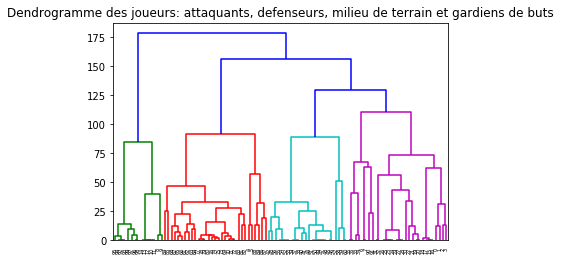

In [17]:
# Dendrogramme des joueurs
fonction_linkage(data_to_use)

In [18]:
# Récupération des données pour le clustering avce k_means
data_to_use = get_data(data_row)
data_to_use = remove_data_test(data_to_use)
data_to_use = data_to_use[columns_playerattributes_needed]

/home/sabrina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/sabrina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
# Utilisation de k_means sklearn pour définir les 4 clusters
k_means = k_means_sklearn(data_to_use)

In [20]:
# Récupération des joueurs pour la vérification de la validité du clustering
attaquants = get_attaquants()
defenseurs = get_defenseurs()
milieu_de_terrain = get_milieu_de_terrain()
gardiens_de_buts = get_gardiens_de_buts()

In [28]:
# Utilisation de l'algorithme k_moyennes
c_km = clustering_km(data_to_use, 4, 1000, 0.005) # Instantiation 
c_km.train()

## Partie 5 - Résultats

In [23]:
# Transformation des données pour l'affichage
data_embedded_kmeans = transformer_donnees_kmeans(data_to_use)
k_means_ = k_means_sklearn(data_embedded_kmeans)

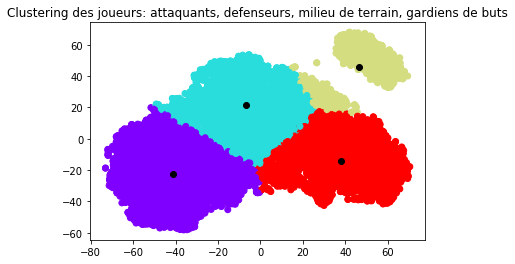

In [24]:
# Affichage des clusters en utilisant k_means des sklearn
afficher_clustering(data_embedded_kmeans, k_means_.labels_, k_means_.cluster_centers_)

In [31]:
test_clustering(k_means)

Le résultat sur les attaquants:
[0 0 0 0]
Le résultat sur les défenseurs:
[3 3 3 3]
Le résultat sur les milieu de terrain:
[3 3 3 3]
Le résultat sur les gardiens du buts:
[2 2 2 2]


In [32]:
# Prédiction avec l'algorithme k_moyennes
# Les attaquants
print("Prédiction sur les attaquants:")
for a in attaquants:
    print(c_km.predict(a))
# Les defenseurs
print("Prédiction sur les defenseurs:")
for d in defenseurs:
    print(c_km.predict(d))
# Les milieu de terrains
print("Prédiction sur les milieu de terrains:")
for m in milieu_de_terrain:
    print(c_km.predict(m))
# Les gardiens de buts
print("Prédiction sur les gardiens de buts:")
for g in gardiens_de_buts:
    print(c_km.predict(g))

Prédiction sur les attaquants:
2
2
2
2
Prédiction sur les defenseurs:
3
3
3
3
Prédiction sur les milieu de terrains:
2
2
2
2
Prédiction sur les gardiens de buts:
0
0
0
0


## Partie 6 - Analyse

<ul>
<li> Le clustering établi par l'algorithme des k-moyennes forme bien 4 clusters différents - d'après l'affichage obtenu après application du TSNE pour projeter les données sur 2 dimensions -
</li>
<li>
La prédiction du cluster auquel appartient un joueur avec de bonnes performances (considérés comme un outlayer) par example Gerard Pique ou bien Andres Iniesta se fait avec certaines confusions à cause de leurs hautes performances. De ce fait, une application de k-means de sklearn montre que les défenseurs sont confondus avec les milieus de terrain et une application de notre algorithme de k-moyennes rend une certaine confusion entre les milieus de terrains et les attaquants.<br>
Dans les deux cas, les attaquants et les gardiens de buts sont toujours bien séparés. 
</li>
</ul>